In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [2]:
# Example code to download dataset from Kaggle
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d 'dataset_name'
!unzip -q 'dataset_name.zip'


cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Missing the required parameter `owner_slug` when calling `metadata_get`
unzip:  cannot find or open dataset_name.zip, dataset_name.zip.zip or dataset_name.zip.ZIP.


In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [6]:
!kaggle datasets download -d kunalgupta2616/dog-vs-cat-images-data


Dataset URL: https://www.kaggle.com/datasets/kunalgupta2616/dog-vs-cat-images-data
License(s): GPL-2.0
100% 990M/991M [00:57<00:00, 20.7MB/s]
100% 991M/991M [00:57<00:00, 17.9MB/s]


In [7]:
!unzip -q dog-vs-cat-images-data.zip


In [8]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

validation_datagen = ImageDataGenerator(rescale=1./255)


In [11]:
!ls


dogcat	dog-vs-cat-images-data.zip  kaggle.json  sample_data


In [12]:
!ls dogcat


sampleSubmission.csv  test1  train  validation


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set up data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Rescale validation images (no augmentation for validation set)
validation_datagen = ImageDataGenerator(rescale=1./255)

# Set up the train generator
train_generator = train_datagen.flow_from_directory(
    'dogcat/train',             # Path to training directory
    target_size=(150, 150),      # Resizing images to 150x150 pixels
    batch_size=32,
    class_mode='binary'          # Binary classification
)

# Set up the validation generator
validation_generator = validation_datagen.flow_from_directory(
    'dogcat/validation',         # Path to validation directory
    target_size=(150, 150),      # Resizing images to 150x150 pixels
    batch_size=32,
    class_mode='binary'          # Binary classification
)


Found 25000 images belonging to 2 classes.
Found 8000 images belonging to 2 classes.


In [4]:
from tensorflow.keras import layers, models

# Initialize the model
model = models.Sequential()

# Add convolutional layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Add dense layers
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))  # Dropout to reduce overfitting
model.add(layers.Dense(1, activation='sigmoid'))  # Binary output

# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Summary of the model
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 15, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       3,211,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
!pip install --upgrade tensorflow keras


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 48.7 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1


In [5]:
# Set up model training
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),  # Use the total number of batches in train_generator
    epochs=20,  # Number of epochs to train
    validation_data=validation_generator,
    validation_steps=len(validation_generator)  # Use the total number of batches in validation_generator
)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 181s 222ms/step - accuracy: 0.5410 - loss: 0.6892 - val_accuracy: 0.6330 - val_loss: 0.6252
Epoch 2/20


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 170s 216ms/step - accuracy: 0.6426 - loss: 0.6272 - val_accuracy: 0.6600 - val_loss: 0.6033
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 20us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 203s 217ms/step - accuracy: 0.6884 - loss: 0.5813 - val_accuracy: 0.7444 - val_loss: 0.5072
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 24us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 169s 215ms/step - accuracy: 0.7273 - loss: 0.5394 - val_accuracy: 0.7934 - val_loss: 0.4391
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 22us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 173s 219ms/step - accuracy: 0.7536 - loss: 0.5049 - val_accuracy: 0.8194 - val_loss: 0.3989
Epoch 10/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 1

In [6]:
# Evaluate the model on the validation data
val_loss, val_acc = model.evaluate(validation_generator)
print(f"Validation Accuracy: {val_acc * 100:.2f}%")


250/250 ━━━━━━━━━━━━━━━━━━━━ 12s 49ms/step - accuracy: 0.8905 - loss: 0.2586
Validation Accuracy: 89.19%


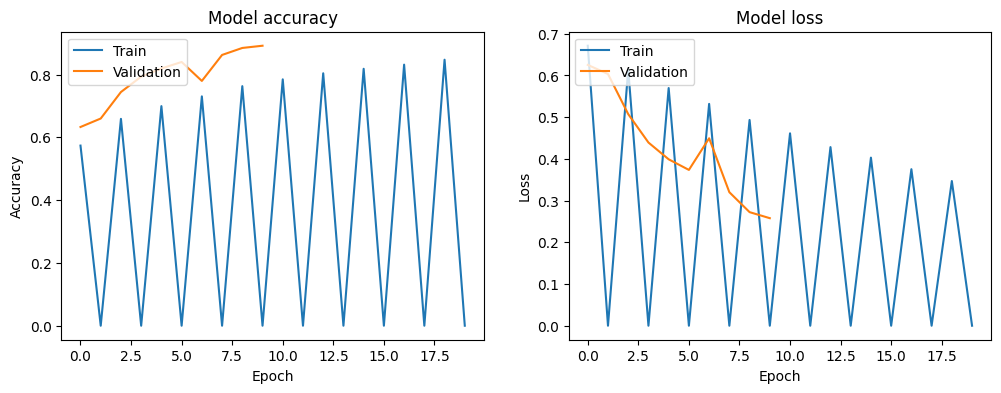

In [7]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


In [9]:
# Save the model to disk
model.save('my_model.keras')


In [10]:
from tensorflow.keras.models import load_model

# Load the model from disk
model = load_model('my_model.keras')


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 14 variables whereas the saved optimizer has 26 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [11]:
from tensorflow.keras.preprocessing import image
import numpy as np

def prepare_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))  # Resize image to match model input
    img_array = image.img_to_array(img)  # Convert image to array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Rescale image (same as during training)
    return img_array


In [12]:
# Path to the image you want to predict
img_path = 'testing.jpg'

# Prepare the image
img_array = prepare_image(img_path)

# Predict
predictions = model.predict(img_array)
predicted_class = 'dog' if predictions[0] > 0.5 else 'cat'

print(f"The image is predicted to be a {predicted_class}.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 744ms/step
The image is predicted to be a dog.


In [13]:
# Path to the image you want to predict
img_path = 'testing2.jpg'

# Prepare the image
img_array = prepare_image(img_path)

# Predict
predictions = model.predict(img_array)
predicted_class = 'dog' if predictions[0] > 0.5 else 'cat'

print(f"The image is predicted to be a {predicted_class}.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
The image is predicted to be a cat.
